dist = Normal{Float64}(μ=20.0, σ=10.0)
n = 5
μ = 20.0
σ = 10.0
nct = NoncentralT{Float64}(ν=4.0, λ=4.47213595499958)
(mean(NCT), std(NCT)) = (5.606000394889274, 3.2593022255353974)
(mean(nct), std(nct)) = (5.604991216397929, 3.2533173014789187)
(√n * μ) / σ = 4.47213595499958


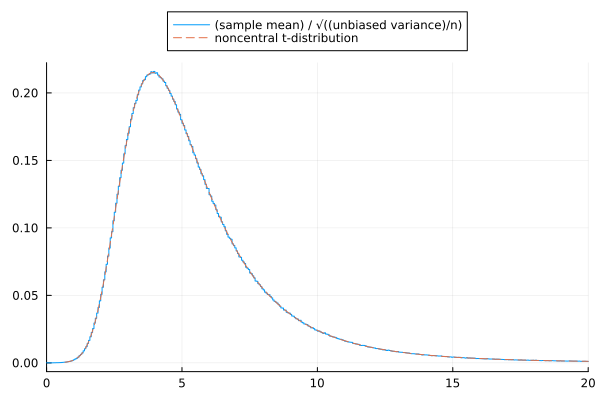

In [1]:
using Distributions
using Random
using StatsPlots
default(fmt=:png)

function sim(dist, n; L=10^7)
    NCT = zeros(L)
    Xtmp = zeros(n)
    for i in 1:L
        X = rand!(dist, Xtmp)
        X̄, S² = mean(X), var(X)
        NCT[i] = X̄ / √(S²/n)
    end
    NCT
end

function plot_sim(dist, n; L=10^7, legend=:outertop, kwargs...)
    μ, σ = mean(dist), std(dist)
    NCT = sim(dist, n; L)
    nct = NoncentralT(n-1, √n*μ/σ)
    @show dist n μ σ nct
    @show mean(NCT), std(NCT)
    @show mean(nct), std(nct)
    @show √n*μ/σ
    stephist(NCT; norm=true, label="(sample mean) / √((unbiased variance)/n)", legend, kwargs...)
    plot!(nct; label="noncentral t-distribution", ls=:dash)
end

plot_sim(Normal(20, 10), 5; xlim=(0, 20))

dist = Uniform{Float64}(a=0.0, b=1.0)
n = 100
μ = 0.5
σ = 0.28867513459481287
nct = NoncentralT{Float64}(ν=99.0, λ=17.320508075688775)
(mean(NCT), std(NCT)) = (17.373698657300128, 1.2868214306593455)
(mean(nct), std(nct)) = (17.453119475985076, 1.610840191949778)
(√n * μ) / σ = 17.320508075688775
full precision may not have been achieved in 'pnt{final}'


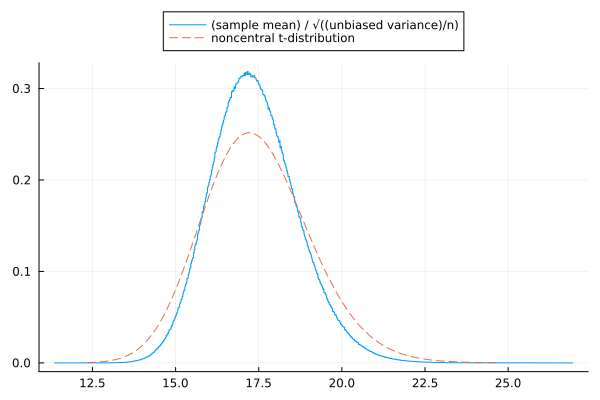

In [2]:
plot_sim(Uniform(), 100)

dist = Laplace{Float64}(μ=2.0, θ=3.0)
n = 5
μ = 2.0
σ = 4.242640687119286
nct = NoncentralT{Float64}(ν=4.0, λ=1.0540925533894596)
(mean(NCT), std(NCT)) = (1.5389467568015847, 1.6494443869878868)
(mean(nct), std(nct)) = (1.3211090992020036, 1.5738147826945494)
(√n * μ) / σ = 1.0540925533894596


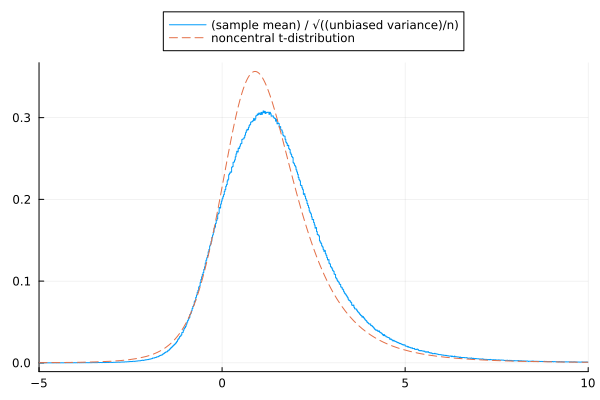

In [3]:
plot_sim(Laplace(2, 3), 5; xlim=(-5, 10))

dist = LogNormal{Float64}(μ=0.0, σ=1.0)
n = 100
μ = 1.6487212707001282
σ = 2.1611974158950877
nct = NoncentralT{Float64}(ν=99.0, λ=7.628739783668903)
(mean(NCT), std(NCT)) = (8.520232725286967, 1.565848940598614)
(mean(nct), std(nct)) = (7.687147877749491, 1.1515201787948046)
(√n * μ) / σ = 7.628739783668903


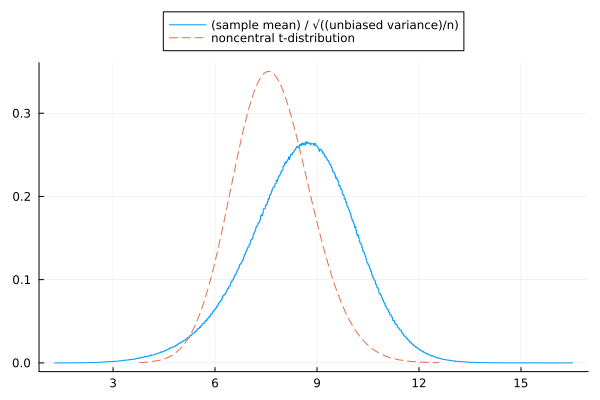

In [4]:
plot_sim(LogNormal(), 100)

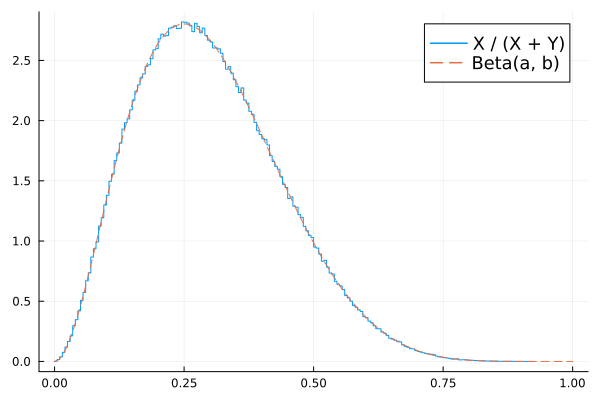

In [6]:
L = 10^6
a, b, θ = 3, 7, 5
X = rand(Gamma(a, θ), L)
Y = rand(Gamma(b, θ), L)
P = @. X / (X + Y)
stephist(P; norm=true, label="X / (X + Y)")
plot!(Beta(a, b); label="Beta(a, b)", ls=:dash)
plot!(legendfontsize=12)